In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Define the custom separators
separator = '\x09'
set_separator = ','

# Specify the path to the dataset file
dataset_file = "data/opt/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-48-1/bro/conn.log.labeled"

df = pd.read_csv(dataset_file, sep='\x09', header=None, comment='#', engine="python")




In [4]:
# rename the columns
with open(dataset_file, 'r') as f:
    for line in f:
        if line.startswith('#fields'):
            fields = line.strip()[8:].split(separator)
            fields = [field.strip() for field in fields]
            print(fields)
            print(len(fields))
            df.columns = fields
        elif line.startswith('#'):
            continue
        else:
            break



['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', 'proto', 'service', 'duration', 'orig_bytes', 'resp_bytes', 'conn_state', 'local_orig', 'local_resp', 'missed_bytes', 'history', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'tunnel_parents   label   detailed-label']
21


In [9]:
last_three_columns = df["tunnel_parents   label   detailed-label"]
benign_value = last_three_columns[0]

# make this series into three different columns. The first element is a column, the second element is a column, and the third element is a column
last_three_columns = last_three_columns.str.split("   ", expand=True)
last_three_columns

# now, integrate the three columns into the original dataframe
df["label"] = last_three_columns[1]

In [10]:
# map the target labels to 0
df['label'] = df['label'].map({"Benign": 0, "Malicious": 1})

# drop nan values
df.dropna(inplace=True)

In [12]:
# create a new dataframe with only the useful columns
df_reduced = df[['id.orig_h', 'id.resp_h', 'proto', 'service', 'duration', 'orig_bytes', 'resp_bytes', 'conn_state', 'local_orig', 'local_resp', 'missed_bytes', 'history', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label']]


In [13]:
# convert the duration column to float
df_reduced["duration"] = df_reduced["duration"].map(lambda x: float(x) if x != "-" else 0.0)

/tmp/ipykernel_4104/713016053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced["duration"] = df_reduced["duration"].map(lambda x: float(x) if x != "-" else 0.0)


In [15]:
# remove id.orig_h, local_orig and local_resp because it is the same for all entries
df_reduced.drop(['id.orig_h', "local_orig", "local_resp"], axis=1, inplace=True)



/tmp/ipykernel_4104/2303882292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced.drop(['id.orig_h', "local_orig", "local_resp"], axis=1, inplace=True)


In [16]:
from sklearn.preprocessing import LabelEncoder
# convert proto and service to categorical columns

encoder = LabelEncoder()
df_reduced["proto"] = encoder.fit_transform(df_reduced["proto"])
df_reduced["service"] = encoder.fit_transform(df_reduced["service"])
df_reduced["conn_state"] = encoder.fit_transform(df_reduced["conn_state"])
df_reduced["id.resp_h"] = encoder.fit_transform(df_reduced["id.resp_h"])
df_reduced["history"] = encoder.fit_transform(df_reduced["history"])

# map all "-" to -1
df_reduced = df_reduced.replace("-", -1)


# normalize the appropiate columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_reduced["duration"] = scaler.fit_transform(df_reduced["duration"].values.reshape(-1, 1))
df_reduced["orig_bytes"] = scaler.fit_transform(df_reduced["orig_bytes"].values.reshape(-1, 1))
df_reduced["resp_bytes"] = scaler.fit_transform(df_reduced["resp_bytes"].values.reshape(-1, 1))
df_reduced["missed_bytes"] = scaler.fit_transform(df_reduced["missed_bytes"].values.reshape(-1, 1))
df_reduced["orig_pkts"] = scaler.fit_transform(df_reduced["orig_pkts"].values.reshape(-1, 1))
df_reduced["orig_ip_bytes"] = scaler.fit_transform(df_reduced["orig_ip_bytes"].values.reshape(-1, 1))
df_reduced["resp_pkts"] = scaler.fit_transform(df_reduced["resp_pkts"].values.reshape(-1, 1))
df_reduced["resp_ip_bytes"] = scaler.fit_transform(df_reduced["resp_ip_bytes"].values.reshape(-1, 1))

/tmp/ipykernel_4104/4205154564.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced["proto"] = encoder.fit_transform(df_reduced["proto"])
/tmp/ipykernel_4104/4205154564.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced["service"] = encoder.fit_transform(df_reduced["service"])
/tmp/ipykernel_4104/4205154564.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [17]:
df_reduced

,id.resp_h,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,725277,1,2,0.033476,37.612726,675.012878,8,0.0,11,70.734418,81.612982,127.521493,657.971376,1
1,725277,1,2,0.049838,37.612726,675.012878,8,0.0,11,69.902300,80.701314,126.038639,657.695278,1
2,725277,1,2,0.009130,38.370573,469.731304,8,0.0,11,49.931470,56.129004,90.450161,458.203724,1
3,725277,1,2,0.019045,37.612726,501.825623,8,0.0,11,54.924177,59.391067,99.347280,513.078237,1
4,725277,1,2,0.030227,37.612726,665.168134,8,0.0,11,69.070182,80.929231,126.038639,648.445989,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394333,964587,0,0,-0.125480,30.286871,-0.002039,0,0.0,0,-0.827723,-0.451411,-0.003888,-0.002441,0
3394334,964587,0,0,-0.125480,30.286871,-0.002039,0,0.0,0,-0.827723,-0.451411,-0.003888,-0.002441,0
3394335,964587,0,0,-0.125480,14.119466,-0.002039,0,0.0,0,-0.827723,-0.907245,-0.003888,-0.002441,0
3394336,964587,0,0,-0.125481,14.119466,-0.002039,0,0.0,0,-0.827723,-0.907245,-0.003888,-0.002441,0


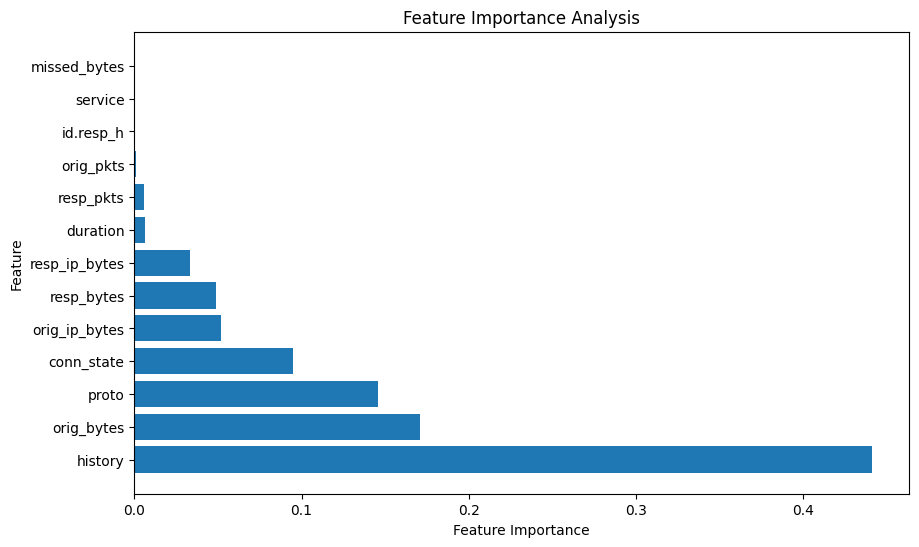

In [18]:
from sklearn.ensemble import RandomForestClassifier

X = df_reduced.drop(columns=['label'])

y = df_reduced['label']


rf = RandomForestClassifier()
rf.fit(X, y)

# Get feature importances from the trained model
feature_importances = rf.feature_importances_

# Create a DataFrame to display feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Analysis')
plt.show()

In [19]:
# Remove less important features
df_reduced.drop(columns=["missed_bytes", "service", "id.resp_h", "orig_pkts", "resp_pkts", "duration"], inplace=True)

In [20]:
df_reduced.to_csv("data/preprocessed_CTU-IoT-Malware-Capture-48-1.csv", index=False)